In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [3]:
from scipy import sparse

# 体格成分が1でそれ以外が0の、2次元NumPy配列を作る
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
sparse_matrix = sparse.csr_matrix(eye)
print("SciPy sparse CSR matrix:\n{}".format(sparse_matrix))

SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


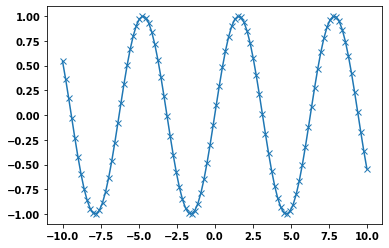

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

In [4]:
import pandas as pd
from IPython.display import display

data = {"Name":["John", "Anna", "Peter", "Linda"],
        "Location":["New York", "Paris", "Berlin", "London"],
        "Age":[24, 13, 53, 33]}

data_pandas = pd.DataFrame(data)

display(data_pandas)
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [7]:
import mglearn
import sklearn
print("mglearn version:{}".format(mglearn.__version__))
print("scikit-learn:{}".format(sklearn.__version__))

mglearn version:0.1.7
scikit-learn:0.22.1


In [17]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [22]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [38]:
print(iris_dataset["DESCR"][:190])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, 


In [26]:
print("Target Names:{}".format(iris_dataset["target_names"]))

Target Names:['setosa' 'versicolor' 'virginica']


In [27]:
print("Feature names:{}".format(iris_dataset["feature_names"]))

Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
print("Type of data:{}".format(type(iris_dataset["data"])))
print("Shape of data:{}".format(iris_dataset["data"].shape))

Type of data:<class 'numpy.ndarray'>
Shape of data:(150, 4)


In [36]:
print("First five columns of data:\n{}".format(iris_dataset["data"][:5]))
print("Type of target:{}".format(type(iris_dataset["target"])))
print("Shape of target:{}".format(iris_dataset["target"].shape))
print("Target:{}".format(iris_dataset["target"]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target:<class 'numpy.ndarray'>
Shape of target:(150,)
Target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"], iris_dataset["target"], random_state=0)
print("X_train shape:{}".format(X_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(112, 4)
X_test shape:(38, 4)
y_train shape:(112,)
y_test shape:(38,)


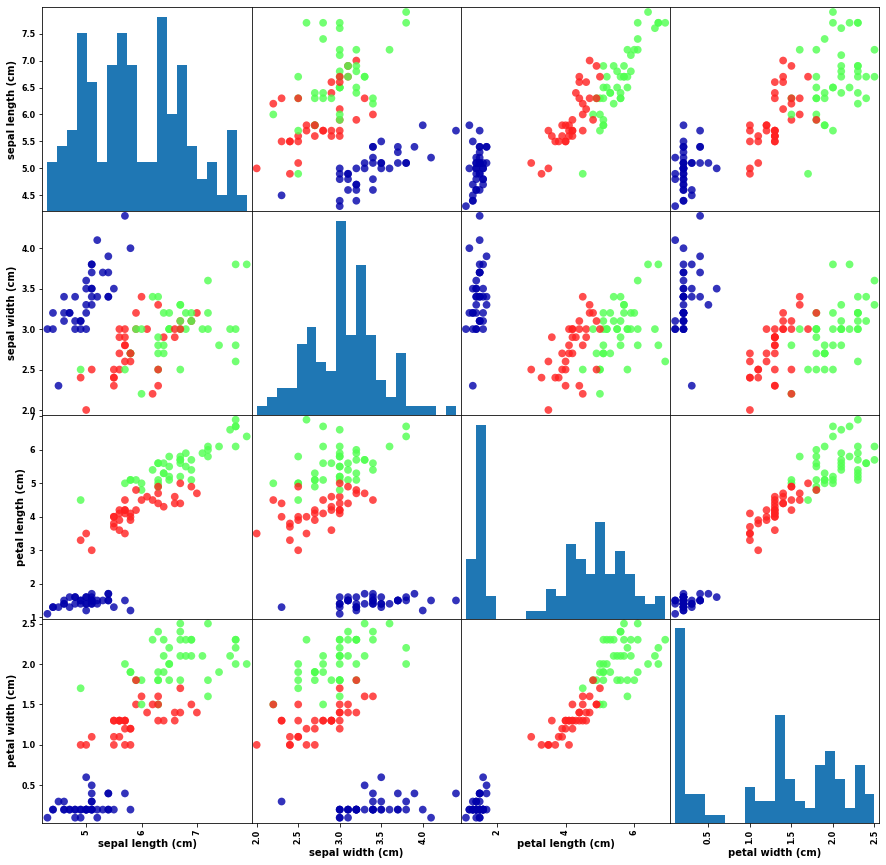

In [46]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                        marker="o", hist_kwds={"bins":20}, s=60, alpha=.8,
                        cmap=mglearn.cm3)